In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_excel('../카드이용내역/거래내역_통합_ver2.0.xlsx')

In [55]:
df['승인일자'] = pd.to_datetime(df['승인일자'])

In [56]:
df['승인시각'] = df['승인시각'].astype('str').str.slice(0,5)

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [58]:
df['승인일자_월'] = pd.to_datetime(df['승인일자']).dt.month

In [59]:
df['승인일자_월'][df['승인일자']>='2023-01-01'] = df['승인일자_월'] + 12

C:\Users\nst42\AppData\Local\Temp\ipykernel_27240\1801733639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['승인일자_월'][df['승인일자']>='2023-01-01'] = df['승인일자_월'] + 12


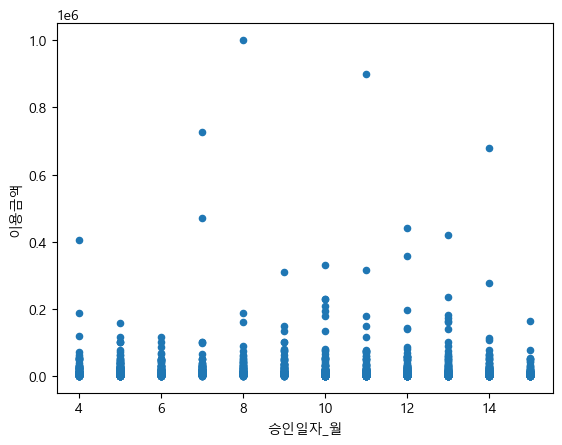

In [60]:
df.plot(kind='scatter',x='승인일자_월',y='이용금액')

plt.show()

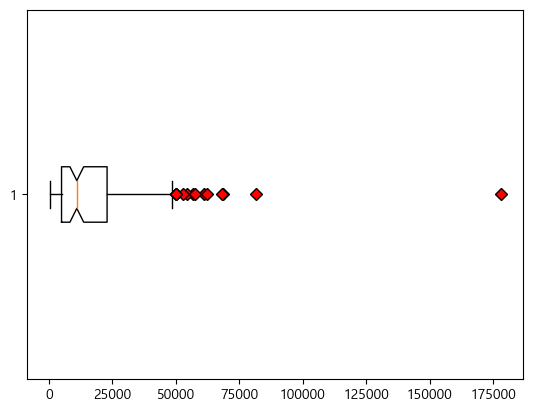

In [61]:
plt.boxplot(df['이용금액'][df['2차분류']=='기타'].values, flierprops =\
                    dict(markerfacecolor = 'r', marker = 'D'), notch=True, vert=False)
plt.show()   

In [4]:
df['분류'].value_counts()
list = df['분류'].value_counts().index

In [5]:
list

Index(['편의점/마트', '식비', '카페', '취미/여가', '의료', '쇼핑', '자동차/기타교통', '대중교통', '생활',
       '미용', '술/유흥', '주거/통신'],
      dtype='object')

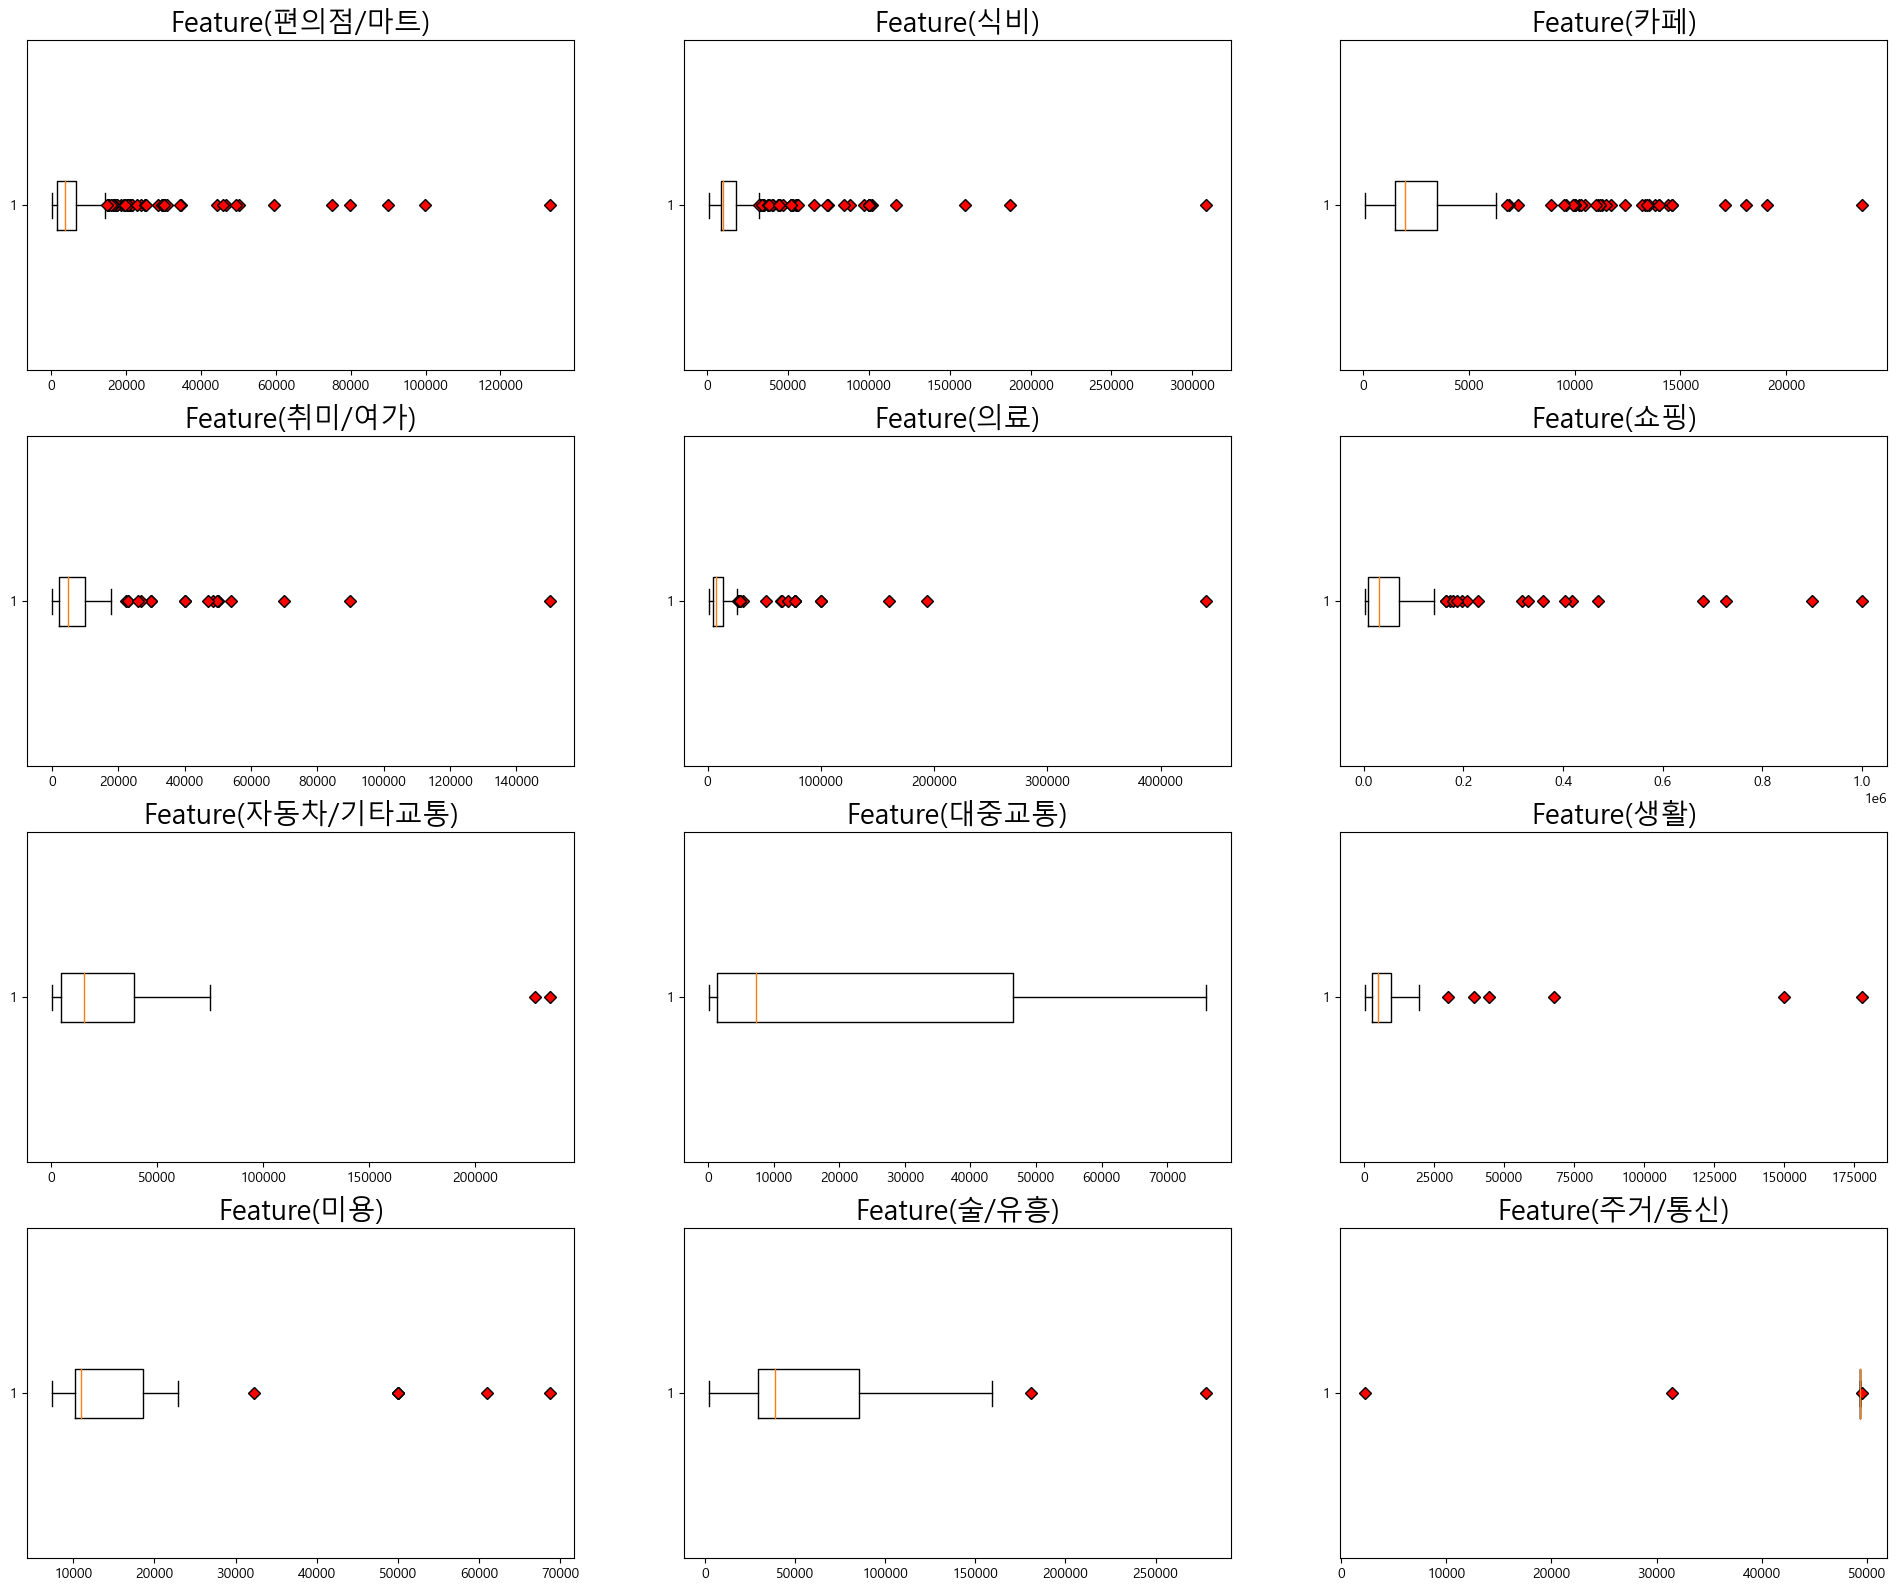

In [10]:
plt.figure(figsize=(24,30))
for i, category_idx in enumerate(list):
    plt.subplot(6,3,i+1)
    plt.boxplot(df['이용금액'][df['분류']==category_idx], flierprops =\
                    dict(markerfacecolor = 'r', marker = 'D'),  vert=False)
    plt.title("Feature" + "(" + category_idx + ")", fontsize = 20) 

plt.show()  


In [ ]:
#  이상치 제거
# def remove_outlier(input_data):
#     q1 = input_data.quantile(0.25) # 제 1사분위수
#     q3 = input_data.quantile(0.75) # 제 3사분위수
#     iqr = q3 - q1 # IQR(Interquartile range) 계산
#     minimum = q1 - (iqr * 1.5) # IQR 최솟값
#     maximum = q3 + (iqr * 1.5) # IQR 최댓값
#     # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치)
#     df_removed_outlier = input_data[(minimum < input_data) & (input_data < maximum)]
#     return df_removed_outlier

In [11]:
#  이상치 제거
for i, category_idx in enumerate(list):
    q1 = df['이용금액'][df['소비유형']==category_idx].quantile(0.16) 
    q3 = df['이용금액'][df['소비유형']==category_idx].quantile(0.84) 
    iqr = q3 - q1 # IQR(Interquartile range) 계산
    minimum = q1 - (iqr * 1.5) # IQR 최솟값
    maximum = q3 + (iqr * 1.5) # IQR 최댓값
    # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치)
    df['이용금액'][df['소비유형']==category_idx] = df['이용금액'][df['소비유형']==category_idx] \
        [(minimum < df['이용금액'][df['소비유형']==category_idx]) \
        & (df['이용금액'][df['소비유형']==category_idx] < maximum)]


C:\Users\nst42\AppData\Local\Temp\ipykernel_14044\1791665704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이용금액'][df['분류']==category_idx] = df['이용금액'][df['분류']==category_idx]\


In [12]:
df.dropna(axis=0, how='any', inplace=True)

In [13]:
df['분류'].value_counts()

편의점/마트      562
식비          510
카페          305
취미/여가       273
의료          106
쇼핑          106
자동차/기타교통     74
대중교통         68
생활           46
미용           30
술/유흥         24
Name: 분류, dtype: int64

In [10]:
df

,승인일자,승인시각,시간코드,요일,가맹점명,이용금액,사용자,주문/방문,정기결제,학원시간,분류,승인일자_월
0,2023-03-23,12:55,12:00,Thu,우정분식,9500.0,e,방문,일반,학원시간 내,식비,2023-03
1,2023-03-23,13:27,13:00,Thu,텐퍼센트서면도서관점,4000.0,e,방문,일반,학원시간 내,카페,2023-03
2,2023-03-22,08:55,08:00,Wed,씨유(CU) M부산서면환승역점,600.0,e,방문,일반,학원시간 내,편의점/마트,2023-03
3,2023-03-22,08:55,08:00,Wed,지에스(GS)25 서면역점,1980.0,d,방문,일반,학원시간 내,편의점/마트,2023-03
4,2023-03-22,12:58,12:00,Wed,KFC부산서면점,7800.0,e,방문,일반,학원시간 내,식비,2023-03
...,...,...,...,...,...,...,...,...,...,...,...,...
2236,2022-04-01,15:42,15:00,Fri,정성약국,15000.0,e,방문,일반,학원시간 내,의료,2022-04
2237,2022-04-01,15:44,15:00,Fri,텐퍼센트서면도서관점,2000.0,e,방문,일반,학원시간 내,카페,2022-04
2238,2022-04-01,16:10,16:00,Fri,롯데슈퍼대연점,5760.0,e,방문,일반,학원시간 내,편의점/마트,2022-04
2239,2022-04-01,18:39,18:00,Fri,주식회사엘에스마트,3200.0,e,방문,일반,학원시간 외,편의점/마트,2022-04


c:\Users\nst42\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


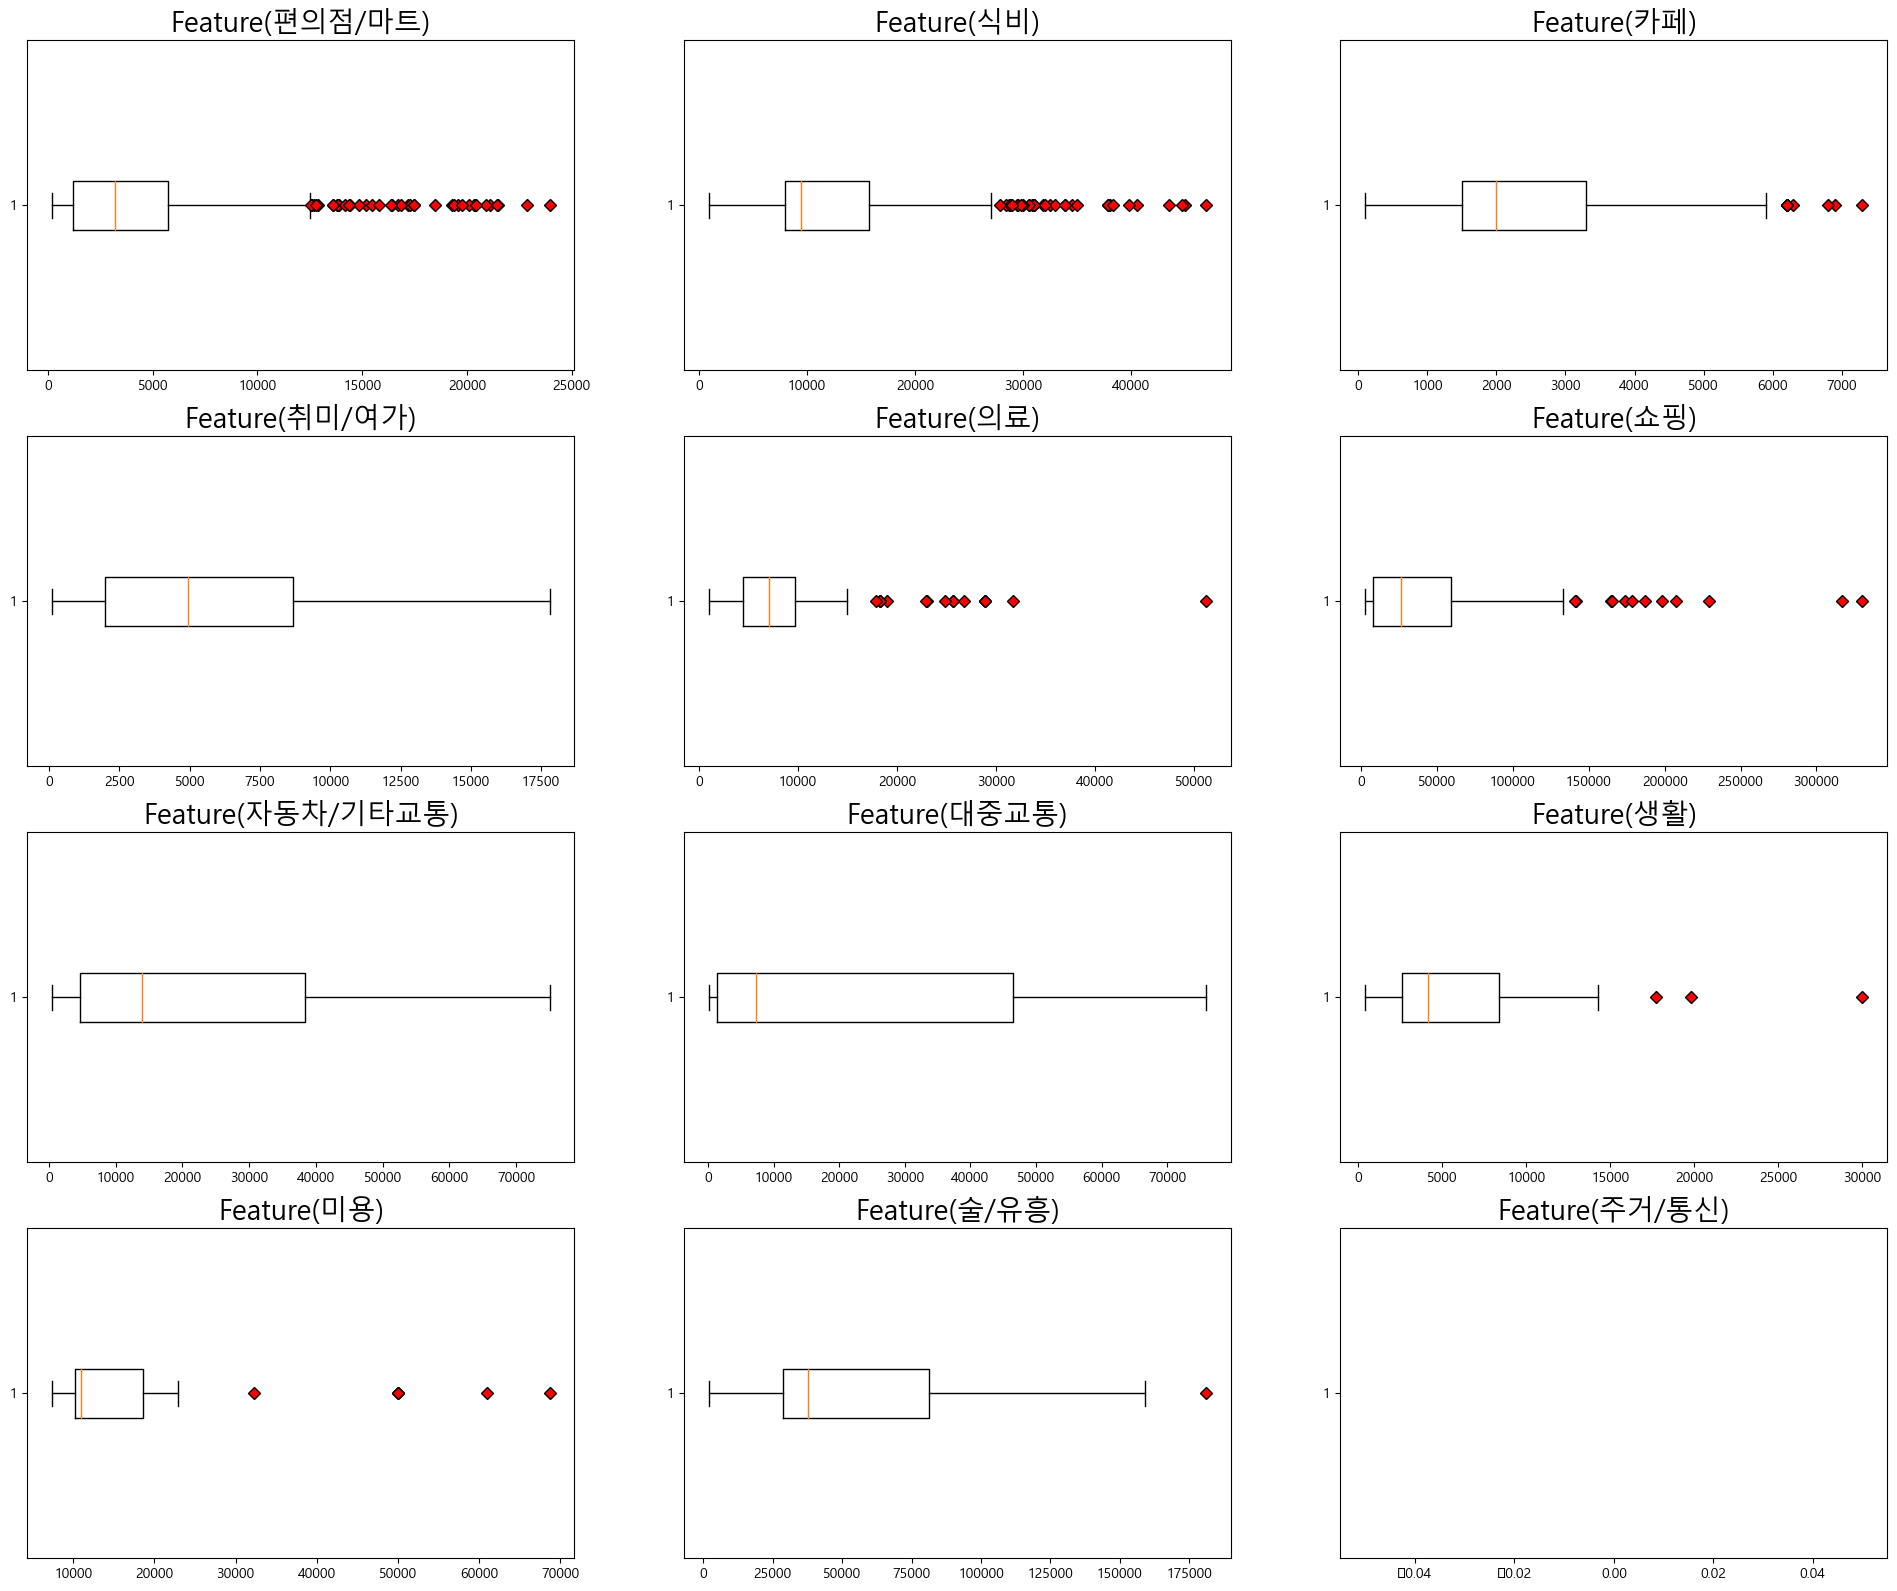

In [14]:
plt.figure(figsize=(24,30))
for i, category_idx in enumerate(list):
    plt.subplot(6,3,i+1)
    plt.boxplot(df['이용금액'][df['분류']==category_idx], flierprops =\
                    dict(markerfacecolor = 'r', marker = 'D'), vert=False)
    plt.title("Feature" + "(" + category_idx + ")", fontsize = 20) 

plt.show()  

In [18]:
df['승인시각_h'] = pd.to_datetime(df['승인시각']).dt.hour

c:\Users\nst42\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


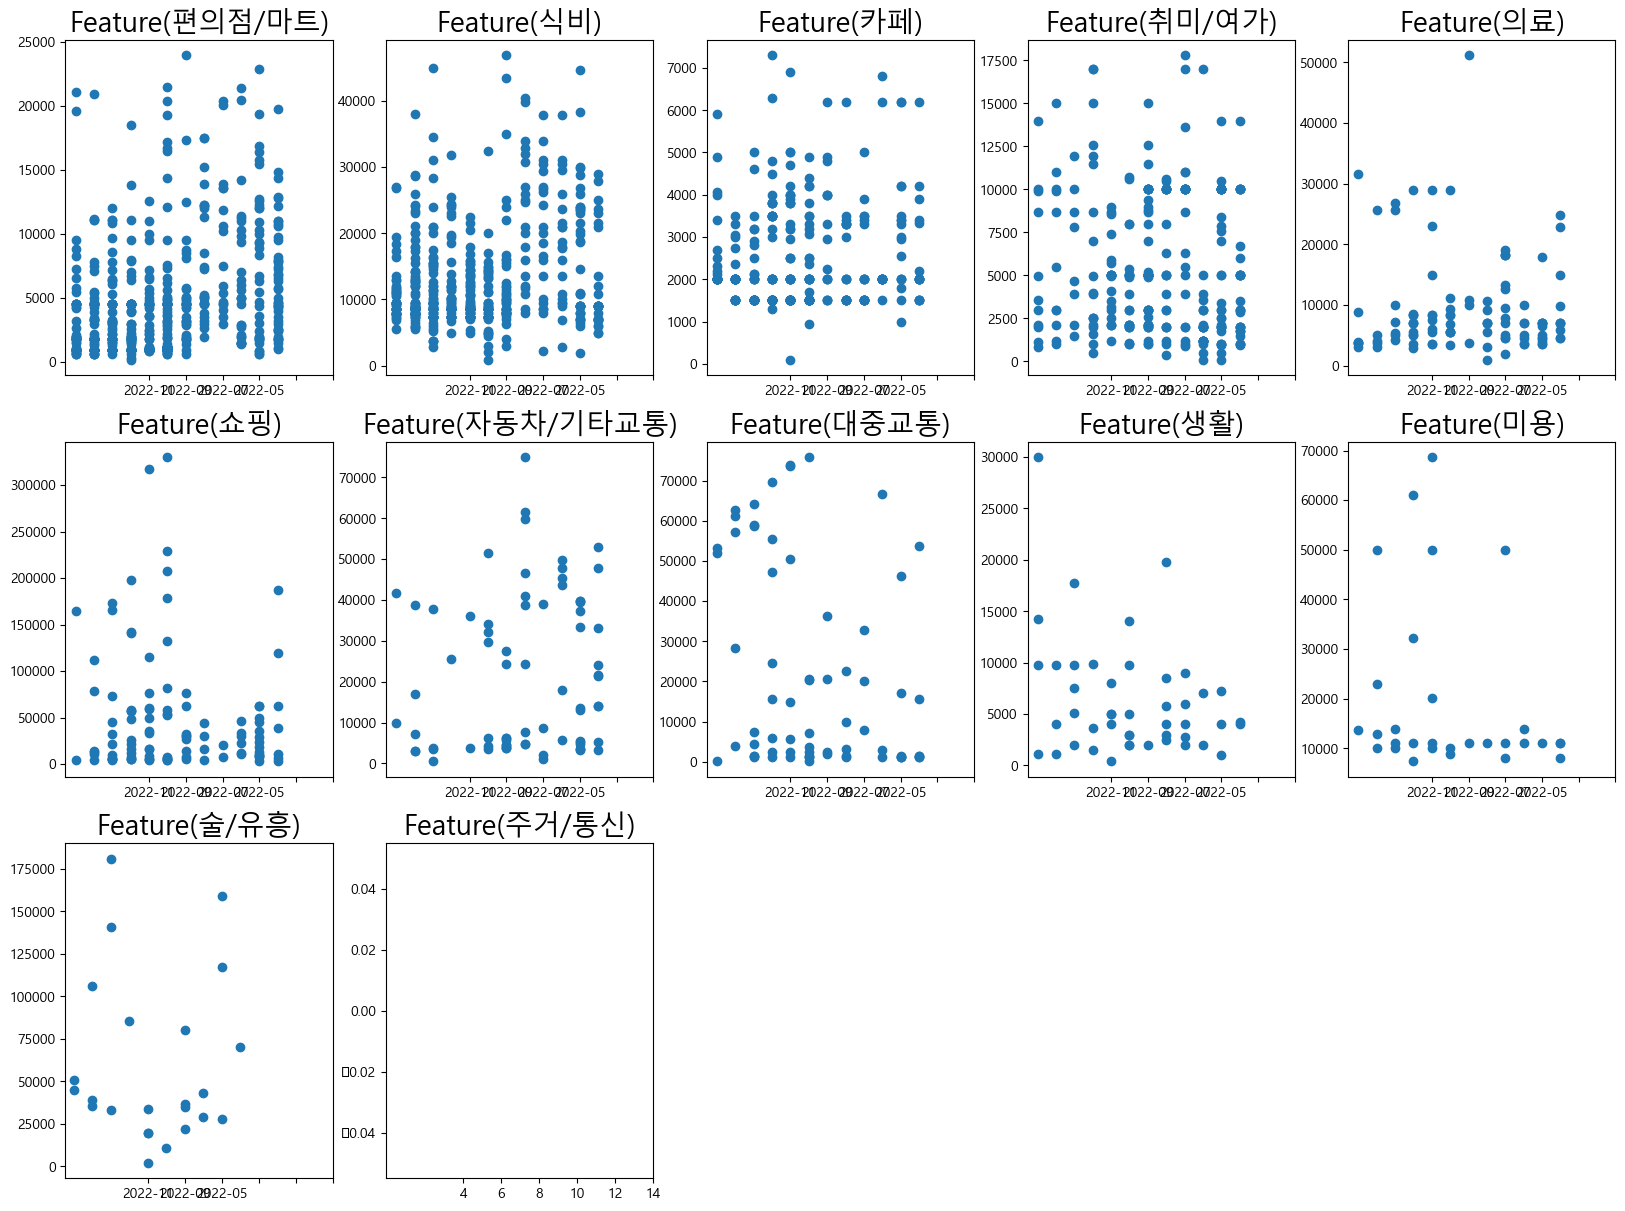

In [14]:
plt.figure(figsize=(20,20))
for i, category_idx in enumerate(list):
    plt.subplot(4,5,i+1)
    plt.scatter(df['승인일자_월'][df['분류']==category_idx],df['이용금액'][df['분류']==category_idx], label=category_idx)
    plt.title("Feature" + "(" + category_idx + ")", fontsize = 20)
    plt.xticks(range(4,16,2))
    

plt.show()


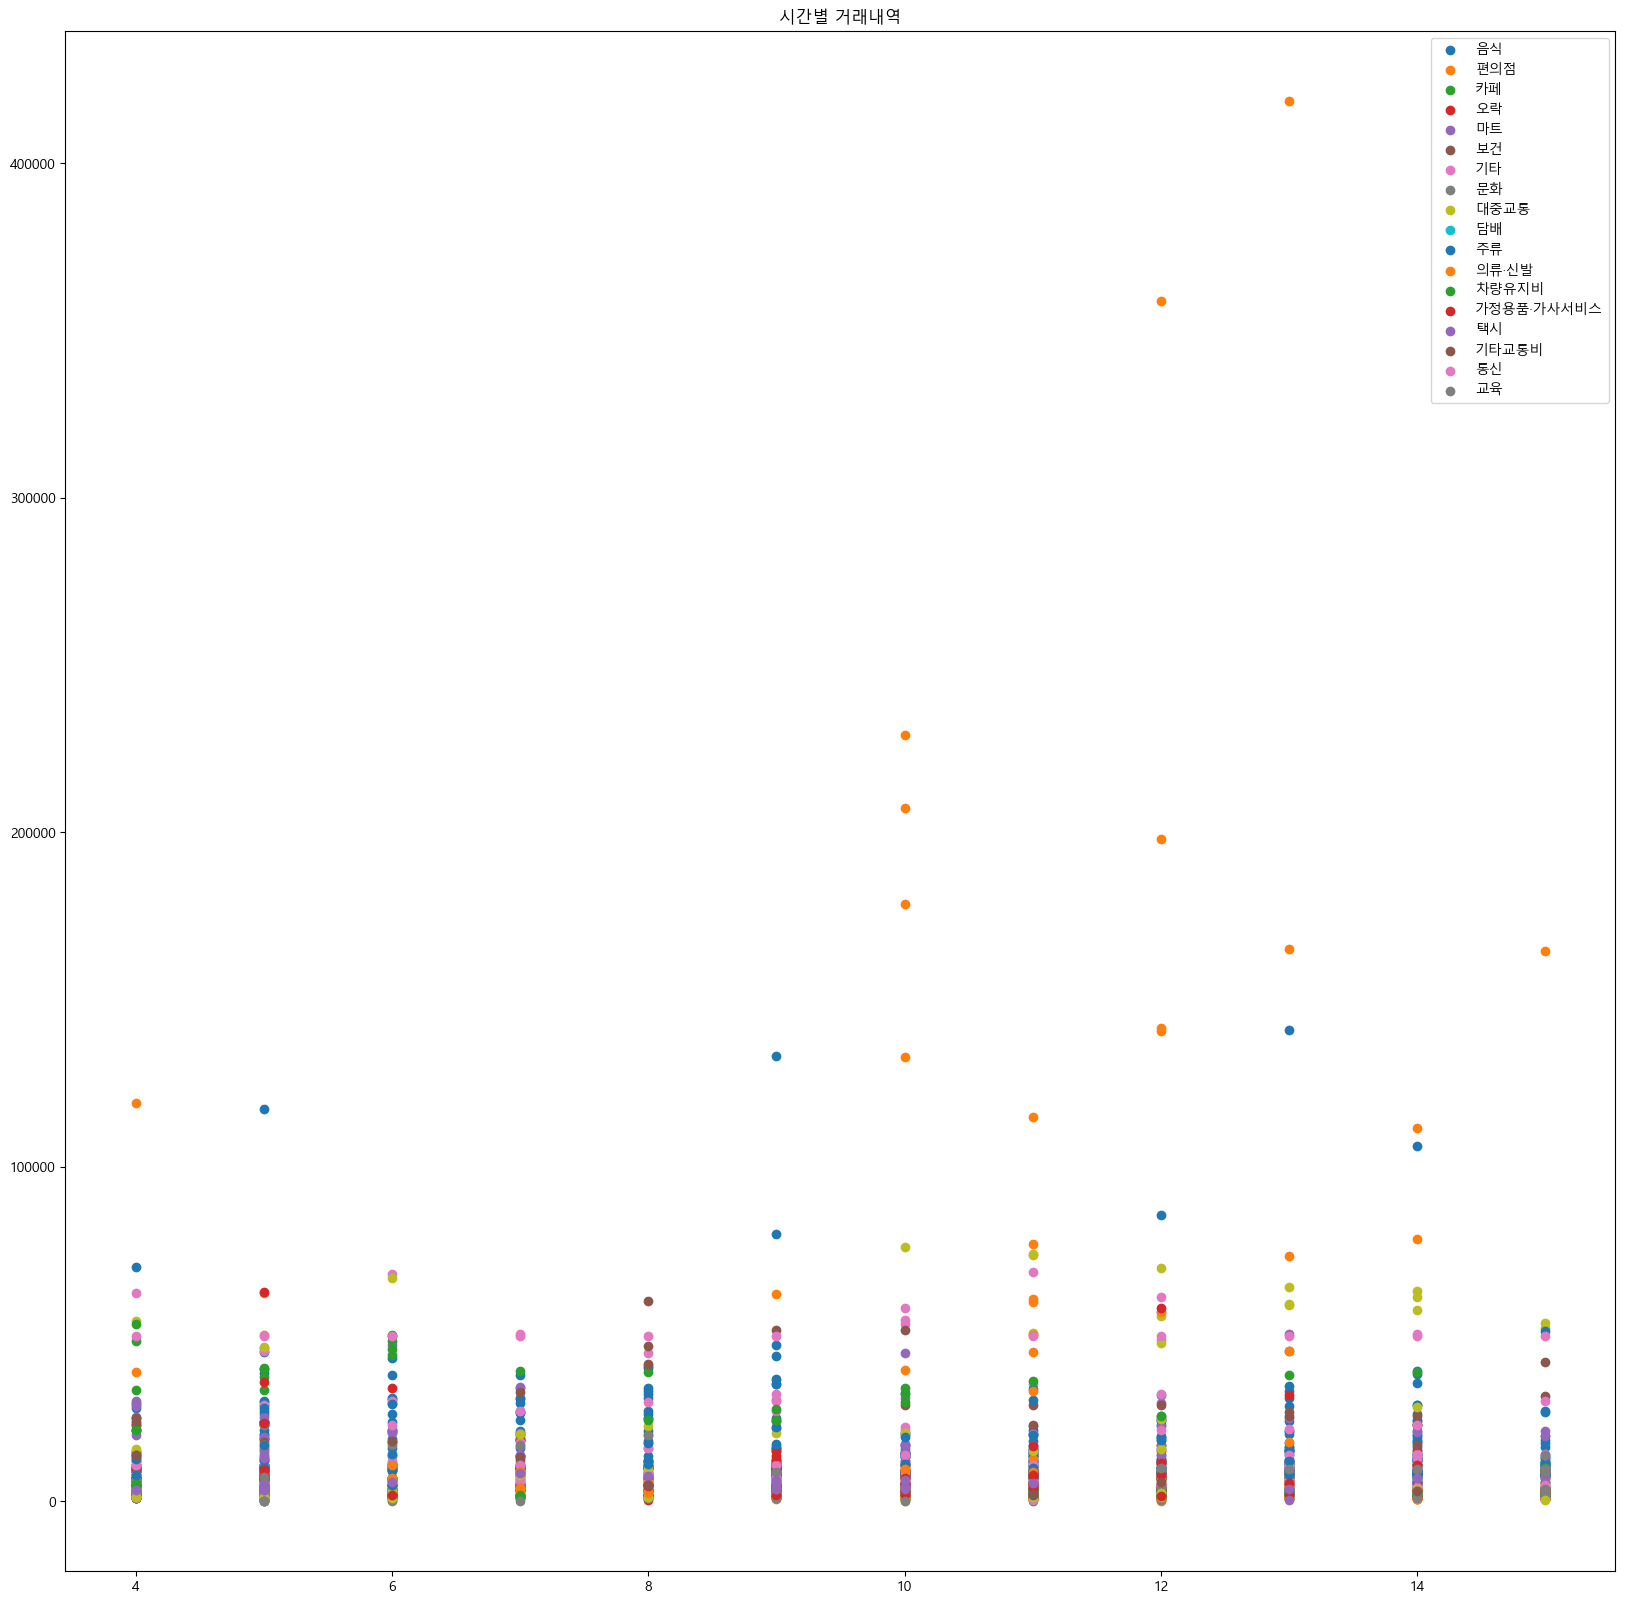

In [47]:
plt.figure(figsize=(20,20))
plt.title('시간별 거래내역')
for i, category_idx in enumerate(list):
    plt.scatter(df['승인일자_월'][df['2차분류']==category_idx],df['이용금액'][df['2차분류']==category_idx], label=category_idx)

plt.legend()
plt.show()

In [15]:
df.to_excel('../카드이용내역/거래내역_통합_ver2.1.xlsx')

In [70]:
df = pd.read_excel('../카드이용내역/거래내역_통합_ver1.3.xlsx')

In [71]:
df

,승인일자,승인시각,가맹점명,이용금액,1차분류,2차분류,사용자,주문/방문,정기결제,학원시간,승인일자_월
0,2023-03-23,12:55,우정분식,9500,음식·숙박,음식,e,1,0,1,15
1,2023-03-23,13:27,텐퍼센트서면도서관점,4000,식료품·비주류음료,카페,e,1,0,1,15
2,2023-03-22,08:55,지에스25 S서면역점,1980,식료품·비주류음료,편의점,d,1,0,1,15
3,2023-03-22,08:55,씨유(CU)M부산서면환승역점,600,식료품·비주류음료,편의점,e,1,0,1,15
4,2023-03-22,12:58,KFC부산서면점,7800,음식·숙박,음식,e,1,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...
2111,2022-04-01,15:42,정성약국,15000,보건,보건,e,1,0,1,4
2112,2022-04-01,15:44,텐퍼센트커피,2000,식료품·비주류음료,카페,e,1,0,1,4
2113,2022-04-01,16:10,롯데슈퍼대연점,5760,식료품·비주류음료,마트,e,1,0,1,4
2114,2022-04-01,18:39,주식회사엘에스마트,3200,식료품·비주류음료,마트,e,1,0,0,4


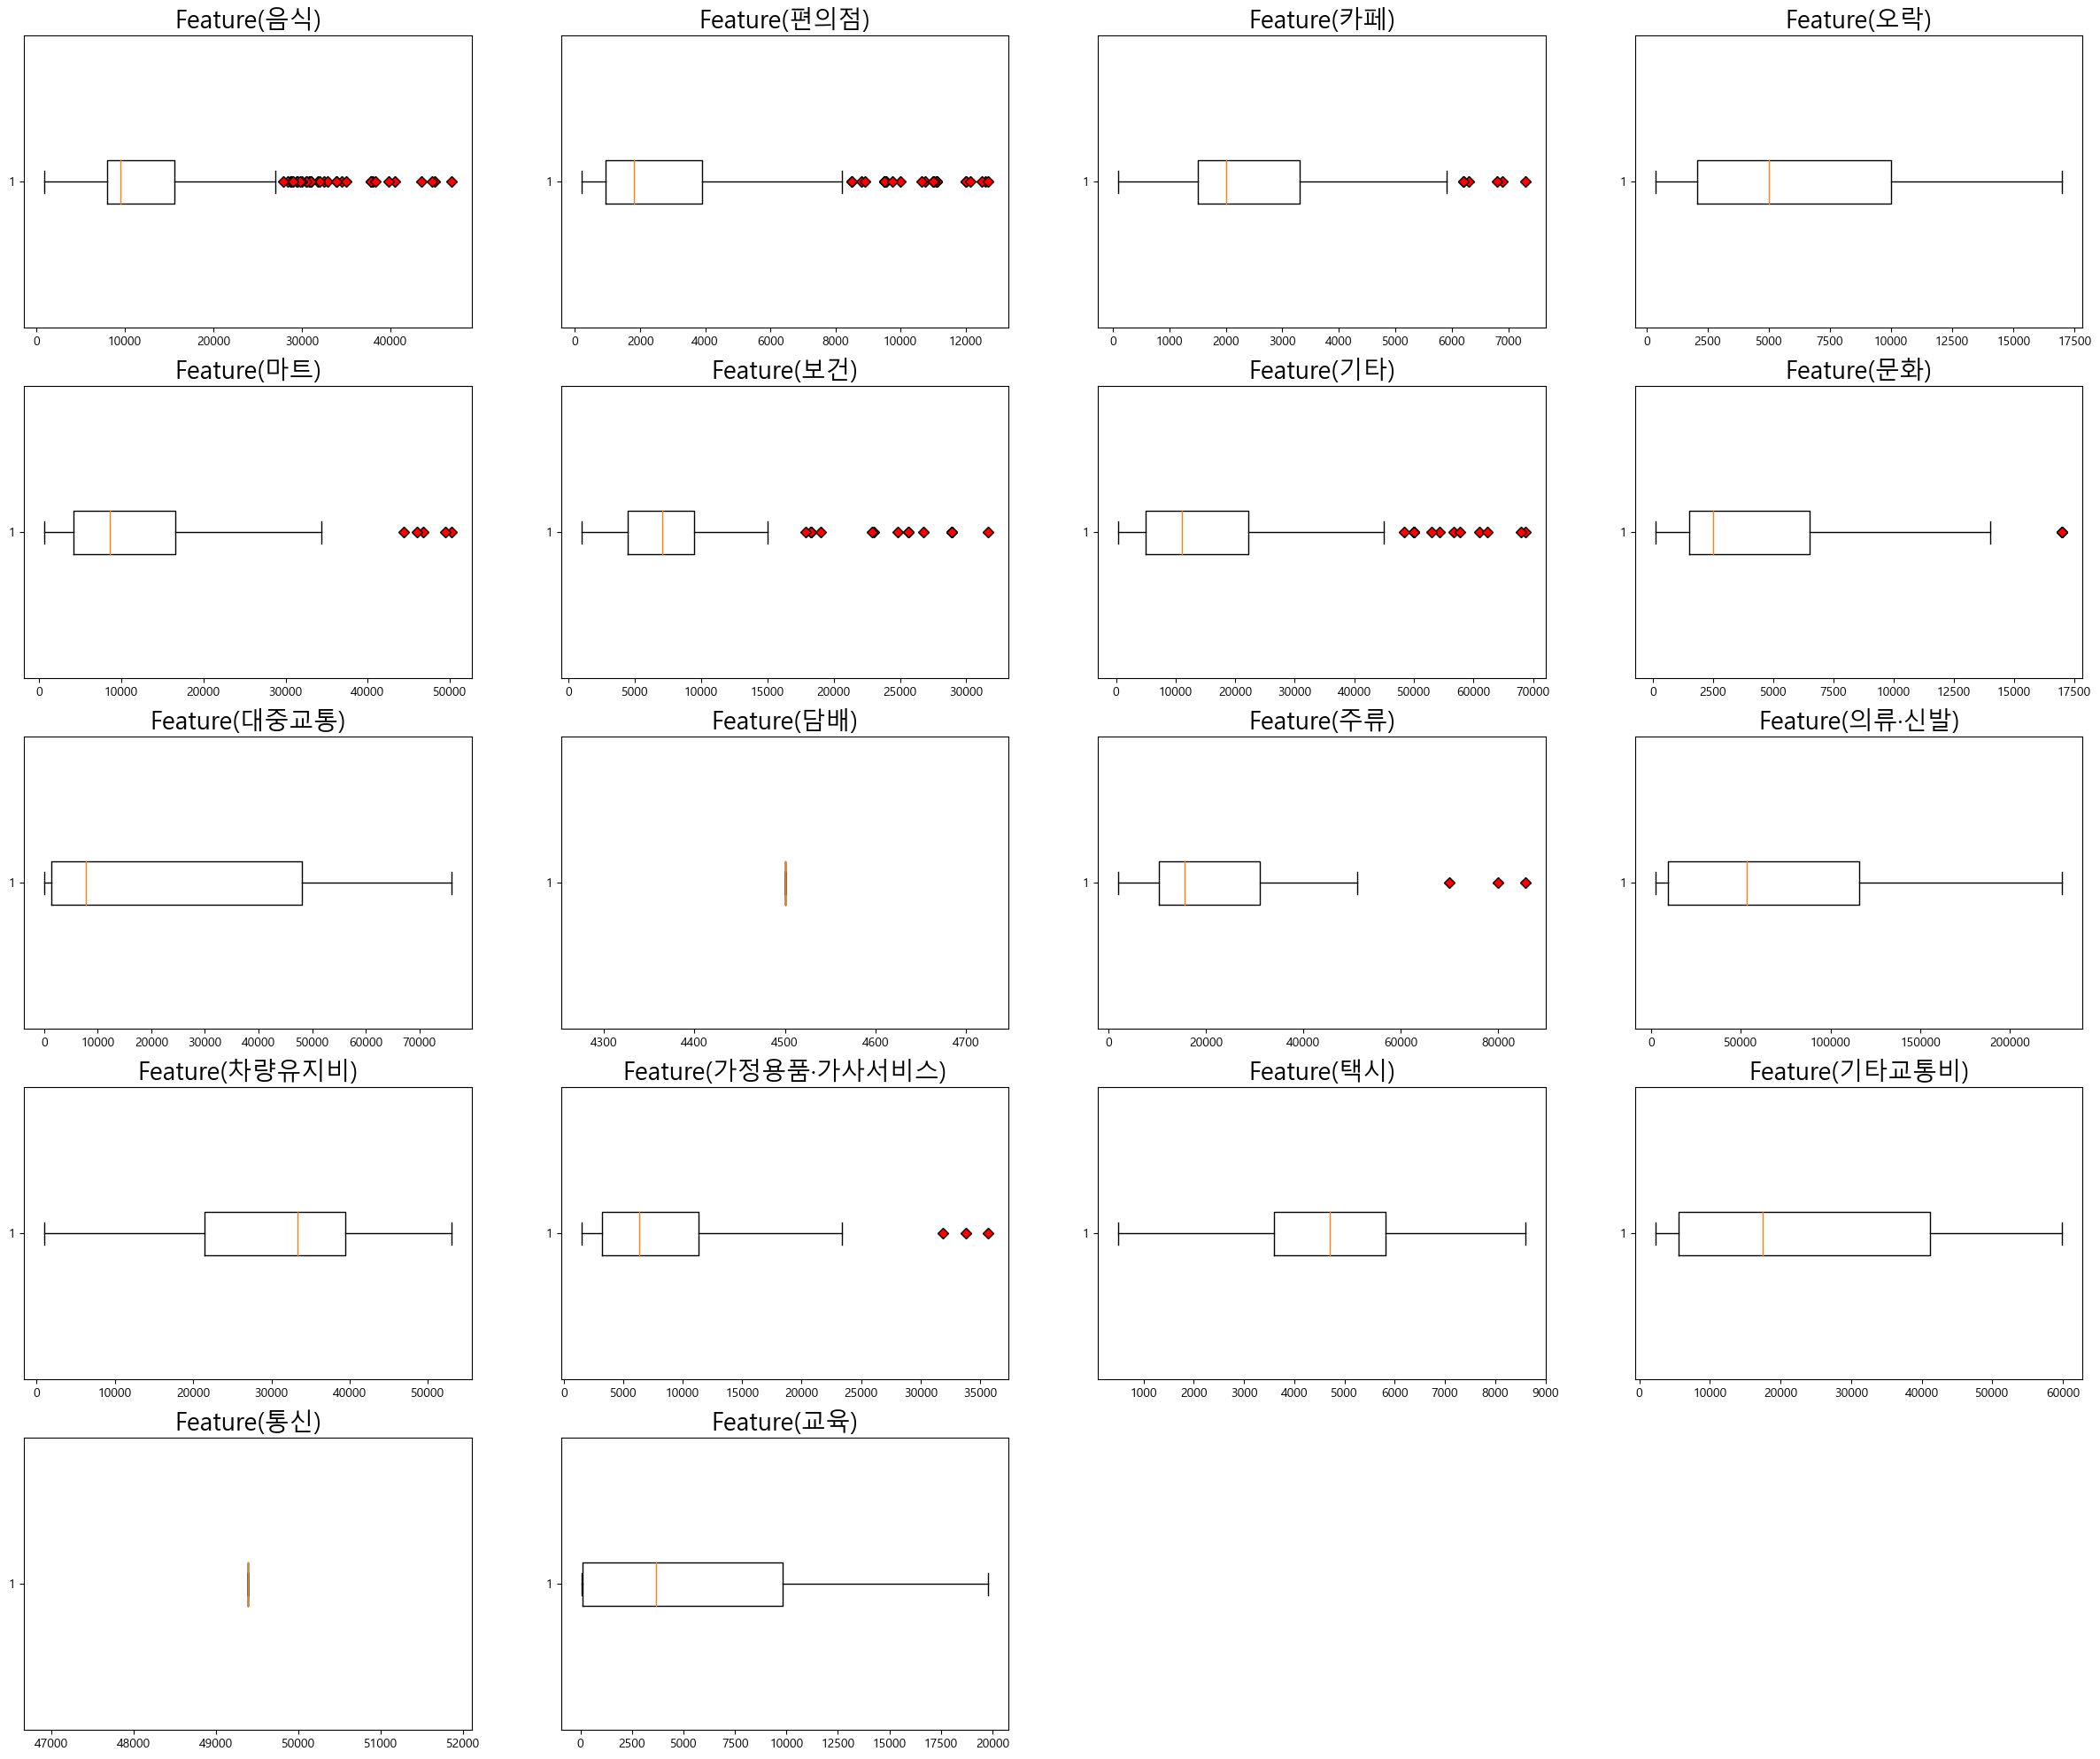

In [72]:
plt.figure(figsize=(30,30))
for i, category_idx in enumerate(list):
    plt.subplot(6,4,i+1)
    plt.boxplot(df['이용금액'][df['2차분류']==category_idx], flierprops =\
                    dict(markerfacecolor = 'r', marker = 'D'), vert=False)
    plt.title("Feature" + "(" + category_idx + ")", fontsize = 20) 

plt.show()  

In [73]:
df

,승인일자,승인시각,가맹점명,이용금액,1차분류,2차분류,사용자,주문/방문,정기결제,학원시간,승인일자_월
0,2023-03-23,12:55,우정분식,9500,음식·숙박,음식,e,1,0,1,15
1,2023-03-23,13:27,텐퍼센트서면도서관점,4000,식료품·비주류음료,카페,e,1,0,1,15
2,2023-03-22,08:55,지에스25 S서면역점,1980,식료품·비주류음료,편의점,d,1,0,1,15
3,2023-03-22,08:55,씨유(CU)M부산서면환승역점,600,식료품·비주류음료,편의점,e,1,0,1,15
4,2023-03-22,12:58,KFC부산서면점,7800,음식·숙박,음식,e,1,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...
2111,2022-04-01,15:42,정성약국,15000,보건,보건,e,1,0,1,4
2112,2022-04-01,15:44,텐퍼센트커피,2000,식료품·비주류음료,카페,e,1,0,1,4
2113,2022-04-01,16:10,롯데슈퍼대연점,5760,식료품·비주류음료,마트,e,1,0,1,4
2114,2022-04-01,18:39,주식회사엘에스마트,3200,식료품·비주류음료,마트,e,1,0,0,4


In [21]:
df = pd.read_excel('../카드이용내역/거래내역_통합_ver2.1.xlsx')

In [40]:
df_q3 = df['이용금액'][(df['승인일자_월']>='2022-10-01')&(df['승인일자_월']<'2023-01-01')].groupby(df['소비유형']).sum()



In [41]:
df_q4 = df['이용금액'][(df['승인일자_월']>='2022-07-01')&(df['승인일자_월']<'2022-10-01')].groupby(df['소비유형']).sum()

In [43]:
df_rate = (df_q3-df_q4)/df_q3

In [44]:
df_rate

소비유형
대중교통        0.637002
미용          0.866532
생활         -0.062191
쇼핑          0.192617
술/유흥        0.641791
식비          0.273486
의료          0.227126
자동차/기타교통   -4.553001
취미/여가      -0.728842
카페          0.429332
편의점/마트     -0.196131
Name: 이용금액, dtype: float64